**Обучение на частично размеченном датасете.  
Метод Self-Training.**


Евгений Борисов <esborisov@sevsu.ru>

---

$X,Y$ - учебный набор, частично размеченный;   
$X^ℓ = \lbrace x_1,\ldots, x_ℓ \rbrace$, $\lbrace y_1, \ldots, y_ℓ \rbrace$ - размеченная часть выборки (labeled data);    
$X^k = \lbrace x_{ℓ+1},\ldots, x_{ℓ+k} \rbrace$ - неразмеченная часть выборки (unlabeled data);	

$b_y(x)$ - оценка принадлежности объекта $x$ к классу $y$

классификатор - выбираем для объекта $x$ класс $y$ с наилучшей оценкой $b$ ;

$$a(x) = \arg \max_{у\in Y} b_y(x)$$

оценка "степень доверия" классификации,  
насколько оценка класса-победителя лучше оценок остальных классов


$$ y = a(b(x)) $$
$$ M(x|a) = \max_{y\in Y} b_y(x) - \max_{q\in Y\setminus y}  b_q(x) $$

Алгоритм self-training — обёртка (wrapper) над произвольным методом обучения классификатора:
    

    
Z := Xℓ ;

пока |Z| < ℓ+k:  
- $a(b((Z))$ ; обучить классификатор $a$ на размеченных данных $Z$
- $X_∆ := \lbrace x \in X^k\setminus Z\ |\ M(x|a) > M_0 \rbrace$ ; оценить неразмеченные и выбрать "надёжные"
- $y_∆ := \lbrace  a(x) | x \in X_∆ \rbrace $  ; доразметить "надёжные"
- $Z := Z \cup X_∆$ ; добавить новые к размеченным  


In [1]:
import numpy as np
from numpy import random as rng

In [2]:
from sklearn.datasets import make_moons

# генерируем датасет
X,target = make_moons(n_samples=500,noise=.1)
X.shape

(500, 2)

In [3]:
# случайным образом делим датасет на размеченный и неразмеченный
random_unlabeled_points = rng.rand(len(target))<.95

target_partial = target.copy()
target_partial[random_unlabeled_points] = -1

len(target),random_unlabeled_points.sum()

(500, 475)

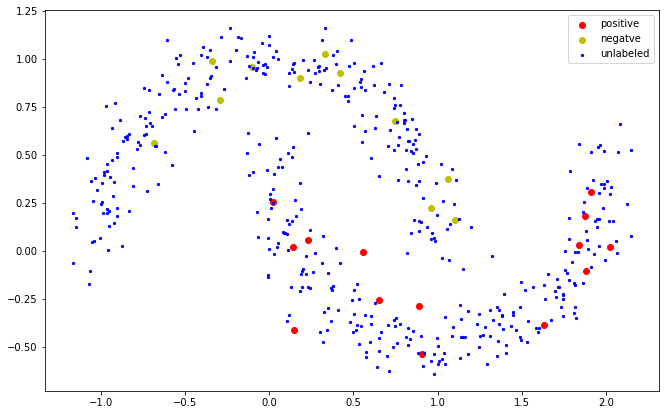

In [4]:
from matplotlib import pyplot as plt

plt.figure(figsize=(11,7))
plt.scatter(X[target_partial==1][:,0],X[target_partial==1][:,1],c='r',label='positive')
plt.scatter(X[target_partial==0][:,0],X[target_partial==0][:,1],c='y',label='negatve')
plt.scatter(X[target_partial==-1][:,0],X[target_partial==-1][:,1],c='b',s=5,label='unlabeled')
plt.legend()

----

In [5]:
from sklearn.semi_supervised import SelfTrainingClassifier
from sklearn.svm import SVC

model = SelfTrainingClassifier( SVC(probability=True,),threshold=.75 ).fit(X,target_partial)

              precision    recall  f1-score   support

           0       0.94      0.99      0.96       250
           1       0.99      0.94      0.96       250

    accuracy                           0.96       500
   macro avg       0.97      0.96      0.96       500
weighted avg       0.97      0.96      0.96       500



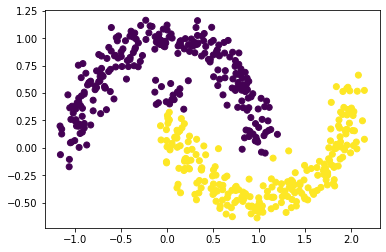

In [6]:
from sklearn.metrics import classification_report
from matplotlib import pyplot as plt

o = model.predict(X)
print(classification_report(target,o))
plt.scatter(X[:,0],X[:,1],c=o)